In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [22]:
num_states = 10    
num_actions = 4     
alpha = 0.1         
gamma = 0.99        
epsilon = 0.1       
episodes = 500     
Q = np.zeros((num_states, num_actions))  
Q_sarsa = np.zeros((num_states, num_actions))  

In [23]:
for episode in range(episodes):
    state = random.randint(0, num_states - 1) 
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon: 
            action = random.randint(0, num_actions - 1)
        else: 
            action = np.argmax(Q[state])
        next_state = (state + action) % num_states
        reward = -1 if next_state == 0 else 1 
        best_future_q = np.max(Q[next_state])
        Q[state, action] += alpha * (reward + gamma * best_future_q - Q[state, action])

        state = next_state
        done = (state == 0)  

### SARSA with Temporal Difference

In [24]:
for episode in range(episodes):
    state = random.randint(0, num_states - 1) 
    action = random.randint(0, num_actions - 1) if random.uniform(0, 1) < epsilon else np.argmax(Q_sarsa[state])
    done = False

    while not done:
        next_state = (state + action) % num_states
        reward = -1 if next_state == 0 else 1  
        next_action = random.randint(0, num_actions - 1) if random.uniform(0, 1) < epsilon else np.argmax(Q_sarsa[next_state])
        Q_sarsa[state, action] += alpha * (reward + gamma * Q_sarsa[next_state, next_action] - Q_sarsa[state, action])
        state = next_state
        action = next_action
        done = (state == 0)  

In [25]:
print("Learned Q-values for Q-learning:")
print(Q)
print("Learned Q-values for SARSA:")
print(Q_sarsa)

Learned Q-values for Q-learning:
[[ -0.1         99.55270529  18.99219109  32.84041021]
 [100.         100.         100.         100.        ]
 [ 99.99987241  99.99990617 100.          99.99992904]
 [ 99.99950687  99.99894214  99.99940702 100.        ]
 [100.         100.         100.         100.        ]
 [ 73.9602262  100.          67.23904998  86.05393971]
 [100.         100.         100.         100.        ]
 [ 99.92315902 100.          99.86867207  96.81905054]
 [100.         100.          97.46558656 100.        ]
 [ 99.78382216  97.33900164 100.          99.8867407 ]]
Learned Q-values for SARSA:
[[9.43138850e-02 9.14446790e+01 1.66746009e+01 0.00000000e+00]
 [9.45447300e+01 9.31222983e+01 9.24581828e+01 9.50160872e+01]
 [6.35377270e+01 5.22390394e+01 9.47784279e+01 7.08351342e+01]
 [4.26669210e+01 6.37482423e+01 9.44265725e+01 3.85723644e+01]
 [9.48466378e+01 9.49917013e+01 9.45742381e+01 9.38888318e+01]
 [9.38178069e+01 9.37026357e+01 9.34388356e+01 9.43625260e+01]
 [9.236292

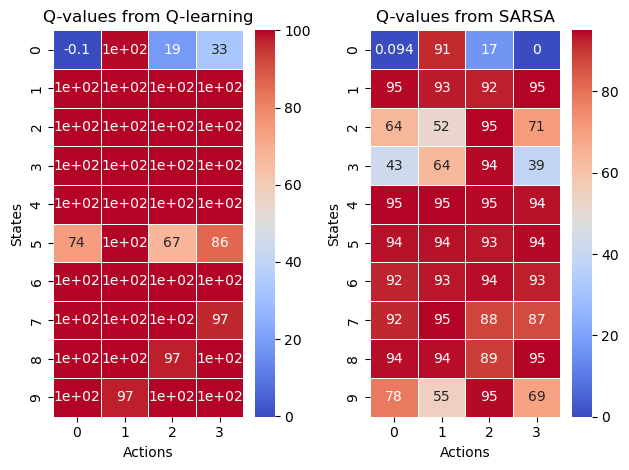

In [26]:
plt.subplot(1, 2, 1)
sns.heatmap(Q, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Q-values from Q-learning')
plt.xlabel('Actions')
plt.ylabel('States')
plt.subplot(1, 2, 2)
sns.heatmap(Q_sarsa, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Q-values from SARSA')
plt.xlabel('Actions')
plt.ylabel('States')
plt.tight_layout()
plt.show()